In [168]:
import pandas as pd
import numpy as np
from glob import glob 
from os.path import join
import ntpath
import os
from collections import defaultdict
import math
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

%matplotlib inline

In [216]:
def matplotlib_setup():
    figure(figsize=(25,12))    
    font = {'size'   : 35}
    plt.rc('font', **font)
    plt.rcParams["axes.linewidth"]  = 2.5
    plt.grid(linewidth=3,axis='y', color='grey')
    
    CB91_Blue = '#2CBDFE'
    CB91_Green = '#47DBCD'
    CB91_Pink = '#F3A0F2'
    CB91_Purple = '#9D2EC5'
    CB91_Violet = '#661D98'
    CB91_Amber = '#F5B14C'
    color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]
    
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)
    plt.rcParams['font.family'] = 'Arial'

    #plt.yticks(np.arange(0,121,20),np.arange(0,121,20) )
    
    return plt
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
LINEWIDTH = 12
MSIZE = 40
MEDGESIZE = 12
YLABEL = '#mean Avg Records \n inrease Rate (against unlimited Cache)'

In [217]:
def get_sampling_dirs(a_dir, only=''):
    dirs= [os.path.join(a_dir, name) for name in os.listdir(a_dir) 
                if os.path.isdir(os.path.join(a_dir, name)) and name.endswith('_l')  ]
    return sorted(dirs)

def replace_w_fc100(d):
        start = d.find('CSVs_r')
        end = d.find('_m_')
        tobe_replaced = d[start:end]
        
        d = d.replace(tobe_replaced,'CSVs_r_1.0')
        return d
    
markers = ['>','*','<','o','^']

In [218]:
GROUP='malicious'
FILTERED=False
INCREASE_RATE_MET = 'mean'
#group = 'all'
#group = 'benign'
filtered_attacks = ['Benign','Infiltration','Brute Force-XSS', 'SQL Injection', 'SSH-BruteForce']


def get_increase_rate_mean(d): # mean of each category
    gt_df = pd.read_csv(join(replace_w_fc100(d),'label_dist.csv'),names=['Label','Count'])
    df = pd.read_csv(join(d,'label_dist.csv'),names=['Label','Count'])
    if GROUP=='malicious':
        if FILTERED:
            return df[(~df['Label'].isin(filtered_attacks))]['Count'].sum()
        else:
            df = df[(df['Label']!='Benign')]
            gt_df = gt_df[(gt_df['Label']!='Benign')]
            return (df['Count']/gt_df['Count']).mean()
        
    else:
        return (df['Count']/gt_df['Count']).mean()
    
    
def get_increase_rate_mean_avg_heavy(d): # mean of each category
    df = pd.read_csv(join(d,'label_dist.csv'),names=['Label','Count'])
    for l in df.Label.unique():
        if l=='Benign':
            continue
        for csvfile in csvs_for_label[l]:
            pd.read_csv(usecols=['Flow ID', 'Label'])
    

def get_increase_rate(d):
    if INCREASE_RATE_MET=='mean':
        return get_increse_rate_mean(d)
    elif INCREASE_RATE_MET == 'mean_avg':
        return get_increase_rate_mean_avg(d)

In [219]:
def get_record_counts(df):
    record_counts = {}
    for l in df.Label.unique():
        df_i = df[df['Label']==l]
        grouped = df_i.groupby(['Flow ID'], sort=True) 
        record_counts[l]=grouped.size()
    return record_counts
        
def get_increase_rate_mean_avg(d): # mean of each category
    fn = join(d,'fold_0.csv')        
    gt_df = pd.read_csv(replace_w_fc100(fn),usecols=['Flow ID', 'Label'])
    gt_df = gt_df[gt_df['Label']!='Benign']
    gt_record_counts = get_record_counts(gt_df)
    
    csv_gt = 'CSVs_r_1.0_m_1.0'
    csv_dirs = ['CSVs_r_0.1_m_1.0', 'CSVs_r_0.01_m_1.0', 'CSVs_r_0.001_m_1.0']
    mean_avg_per_FC = [1]
    
    for csv_dir in csv_dirs:
        df = pd.read_csv(fn.replace(csv_gt, csv_dir),usecols=['Flow ID','Label'])
        df = df[df['Label']!='Benign']
        record_counts = get_record_counts(df)
        increase_rate = {}
        means = [(record_counts[l]/gt_record_counts[l]).mean() for l in sorted(gt_record_counts.keys())]
        #print(type(means), means)
        mean_avg_per_FC.append(np.array(means).mean())
    
    
    #avgs = [(record_counts3[l]/gt_record_counts[l]).mean() for l in gt_record_counts.keys()]
    #mean_avg_ri = np.array(avgs).mean()
    return mean_avg_per_FC

In [228]:
len('errt')

4

In [220]:
def extract_sampler_names(dir_names):
    colors = []
    sampler_names = []
    for dir_name in dir_names:
        if 'SFS' in dir_name:
            color='orange'
            label = 'SketchFlow Sampling'
        elif 'SGS' in dir_name:
            color = 'green'
            label = 'Sketch Guided Sampling'
        elif 'SRS' in dir_name:
            color = 'blue'
            label = 'Simple Random Sampling'
        elif 'FFS' in dir_name:
            color = 'red'
            label = 'Fast Filtered Sampling'
        elif 'WS' in dir_name:
            color = 'gray'
            label = 'Without Sampling'
        else:
            print('Investigate plot_comparison',dir_name)
            
        colors.append(color)
        sampler_names.append(label)
    return sampler_names

In [233]:
if FILTERED:
    OUTFILE = '{}_RIR_filtered_{}.png'.format(GROUP, INCREASE_RATE_MET) 
else:
    OUTFILE = '{}_RIR_{}.png'.format(GROUP, INCREASE_RATE_MET)

xtick_labels = ['100%','10%','1%','0.1%']
xtick_indices = np.arange(len(xtick_labels))


FFS_(8,16,40)_l [1, 1.0588492640675602, 1.397808326934431, 14.629510069532628]
SFS_SI_95.33_l [1, 1.042515294334145, 1.3891698141593964, 11.287538112527695]
SGS_e_1_l [1, 1.0090070895442598, 1.126113265956752, 1.24768455512452]
SRS_SI_100_l [1, 1.0490558398430547, 1.3743968139081024, 12.62742529691067]


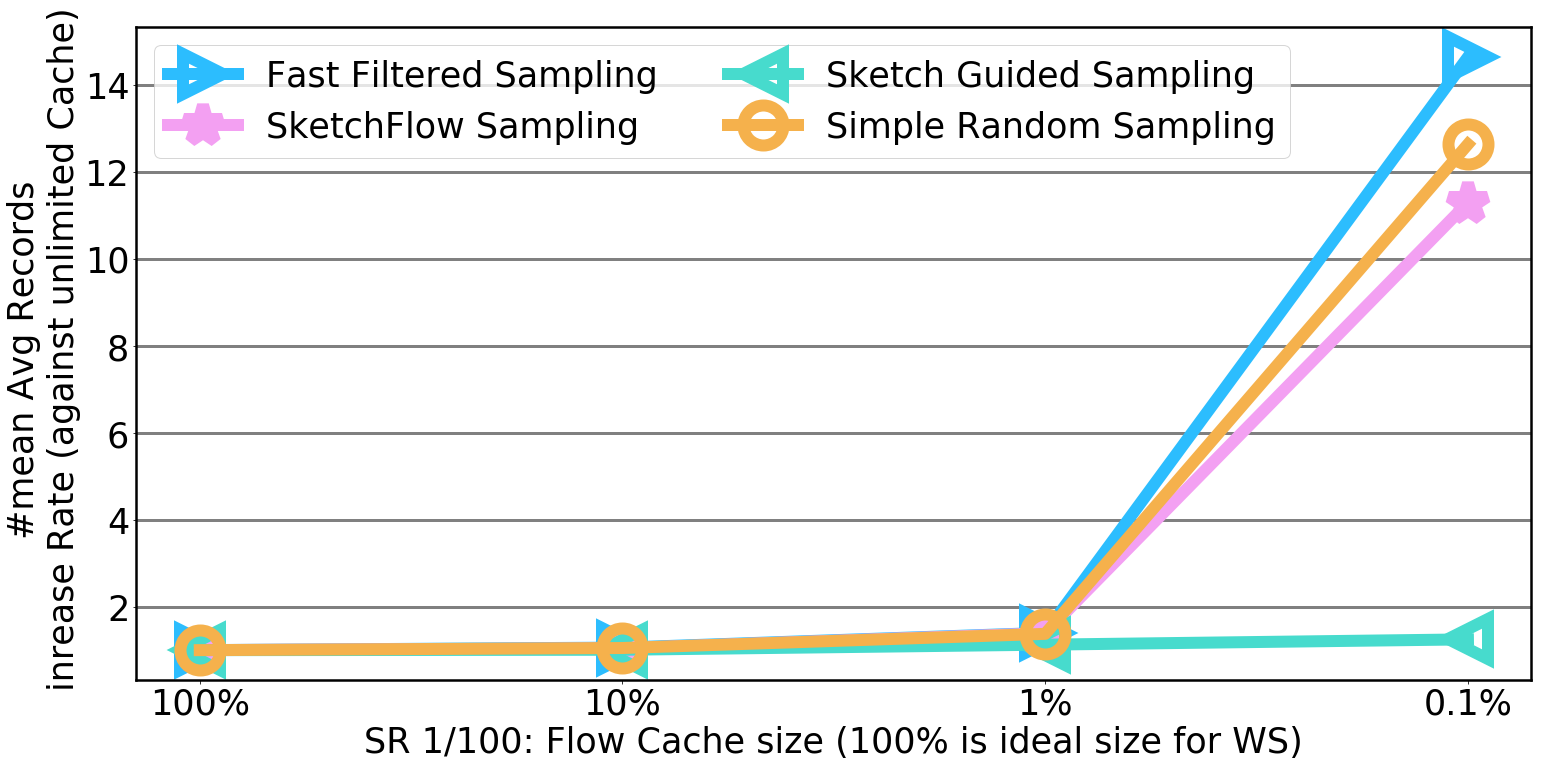

In [234]:
sr_dir = 'SR_1.0'
root = '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/{}/'.format(sr_dir) 
csv_dirs = ['CSVs_r_1.0_m_1.0', 'CSVs_r_0.1_m_1.0', 'CSVs_r_0.01_m_1.0', 'CSVs_r_0.001_m_1.0']

#drawing
matplotlib_setup()
sampler_names = extract_sampler_names(sampling_dirs)

for i,sampler_dir in enumerate(sorted(glob(join(root,'*_l')))):
    results = get_increase_rate_mean_avg(sampler_dir)
    print(ntpath.basename(sampler_dir),results)
    
    plt.plot(results,label=extract_sampler_names([sampler_dir])[0],linewidth=LINEWIDTH,marker=markers[i],\
            markersize=MSIZE, markeredgewidth=MEDGESIZE,markerfacecolor='none')

#plt.grid(linewidth=3)
plt.ylabel(YLABEL)
plt.xlabel('SR 1/100: Flow Cache size (100% is ideal size for WS)')
plt.xticks(xtick_indices,xtick_labels)
#ax.set_ylim(25,60)
#ax.set_ylim(0.4,1.6)
fig.tight_layout()
#ax.legend(bbox_to_anchor=(1., 1.01))
plt.legend(ncol=2)
outfile = join(roots[0],OUTFILE)
plt.savefig(outfile, bbox_inches='tight',dpi=100)
plt.show()

FFS_(8,16,400)_l [1, 1.0206162342852991, 1.06138974534658, 19.25929843138476]
SFS_SI_685.08_l [1, 1.009587335467805, 1.049587335467805, 38.12032807620855]
SGS_e_11.5_l [1, 1.0, 1.0284726733368985, 1.0380095496502193]
SRS_SI_1000_l [1, 1.0181582360570687, 1.0560303770134396, 18.504469589971738]


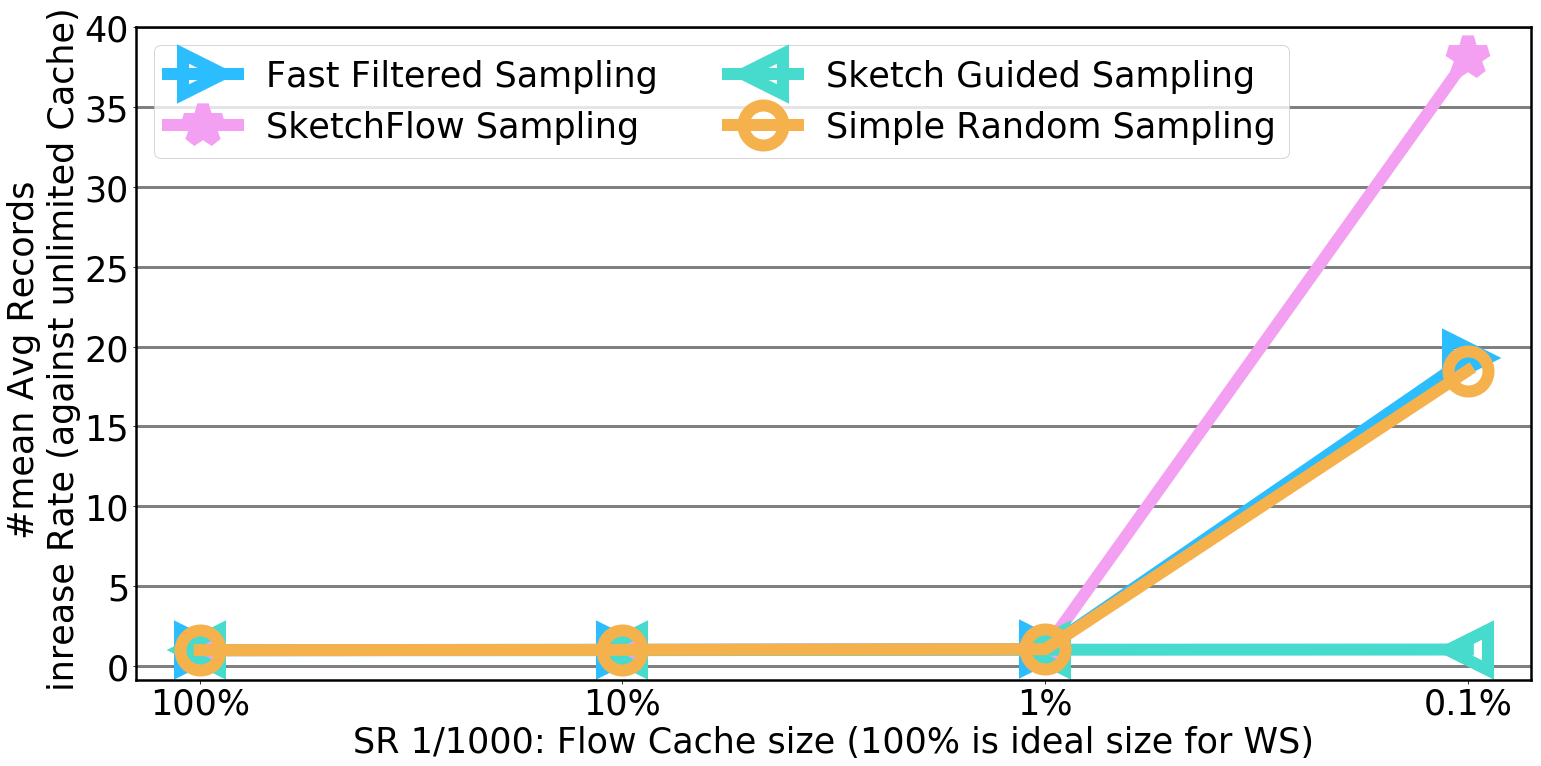

In [230]:
sr_dir = 'SR_0.1'
root = '/data/juma/data/ids18/CSVs_r_1.0_m_1.0/{}/'.format(sr_dir) 
csv_dirs = ['CSVs_r_1.0_m_1.0', 'CSVs_r_0.1_m_1.0', 'CSVs_r_0.01_m_1.0', 'CSVs_r_0.001_m_1.0']

#drawing
matplotlib_setup()
sampler_names = extract_sampler_names(sampling_dirs)

for i,sampler_dir in enumerate(sorted(glob(join(root,'*_l')))):
    results = get_increase_rate_mean_avg(sampler_dir)
    print(ntpath.basename(sampler_dir),results)
    
    plt.plot(results,label=extract_sampler_names([sampler_dir])[0],linewidth=LINEWIDTH,marker=markers[i],\
            markersize=MSIZE, markeredgewidth=MEDGESIZE,markerfacecolor='none')

#plt.grid(linewidth=3)
plt.ylabel(YLABEL)
plt.xlabel('SR 1/1000: Flow Cache size (100% is ideal size for WS)')
plt.xticks(xtick_indices,xtick_labels)
#ax.set_ylim(25,60)
#ax.set_ylim(0.4,1.6)
fig.tight_layout()
#ax.legend(bbox_to_anchor=(1., 1.01))
plt.legend(ncol=2)
outfile = join(roots[0],OUTFILE)
plt.savefig(outfile, bbox_inches='tight',dpi=100)
plt.show()